# F1 Tyre Degradation and Strategy Simulation

This notebook presents a simplified modelling approach to tyre degradation in Formula 1
and evaluates pit-stop strategies based on degradation behaviour.

The objective is to study how degradation trends influence optimal pit windows under
controlled assumptions.

In [1]:
%%bash
cd /content

# move inner repo contents up
mv f1-tyre-strategy-colab/f1-tyre-strategy-colab/* f1-tyre-strategy-colab/

# remove the now-empty nested folder
rm -rf f1-tyre-strategy-colab/f1-tyre-strategy-colab

# verify
cd f1-tyre-strategy-colab
pwd
ls
ls data/processed

/content/f1-tyre-strategy-colab
data
F1_Tyre_Degradation_and_Strategy.ipynb
README.md
requirements.txt
src
race_data.csv


mv: cannot stat 'f1-tyre-strategy-colab/f1-tyre-strategy-colab/*': No such file or directory


In [2]:
%cd f1-tyre-strategy-colab
!pip install -r requirements.txt

/content/f1-tyre-strategy-colab


In [3]:
import sys
sys.path.append("src")

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_loader import load_race_data
from degradation import TyreDegradationModel
from strategy import simulate_strategy

## Data Description

The analysis operates on preprocessed race-level data stored locally for reproducibility.
Each row represents lap-level information used to simulate tyre degradation behaviour.

In [5]:
race_data = load_race_data("data/processed/race_data.csv")
race_data.head()

,lap
0,1
1,2
2,3
3,4
4,5


In [ ]:
model = TyreDegradationModel(alpha=0.03)
model.fit(race_data)

degradation_curve = model.predict()

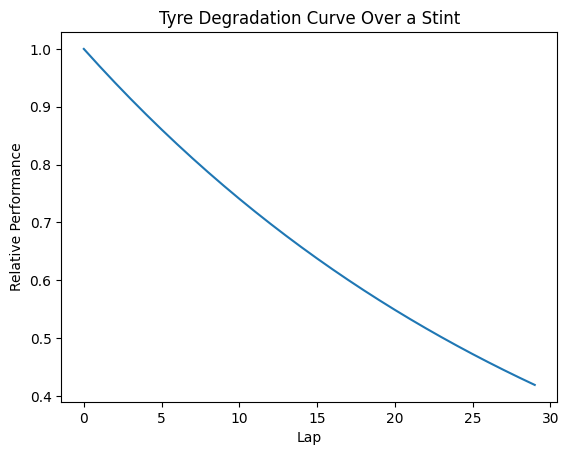

In [7]:
plt.figure()
plt.plot(degradation_curve)
plt.xlabel("Lap")
plt.ylabel("Relative Performance")
plt.title("Tyre Degradation Curve Over a Stint")
plt.show()

In [8]:
total_laps = 70
pit_window = (15, 40)

results = simulate_strategy(
    degradation_model=model,
    total_laps=total_laps,
    pit_window=pit_window
)

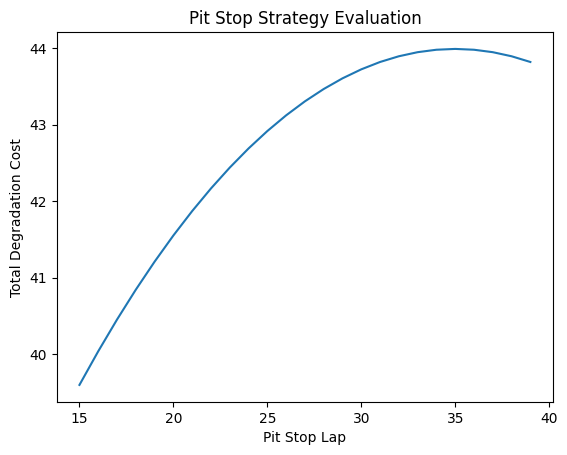

In [9]:
results_df = pd.DataFrame(
    results,
    columns=["Pit Lap", "Total Degradation Cost"]
)

results_df.head()

plt.figure()
plt.plot(results_df["Pit Lap"], results_df["Total Degradation Cost"])
plt.xlabel("Pit Stop Lap")
plt.ylabel("Total Degradation Cost")
plt.title("Pit Stop Strategy Evaluation")
plt.show()

## Observations

- Early pit stops reduce late-stint degradation but shorten the first stint.
- Late pit stops increase degradation accumulation in the second stint.
- A mid-range pit window provides a balance between stint length and degradation cost.

## Assumptions and Limitations

- Tyre degradation is modelled using a simplified exponential decay function.
- External race factors such as traffic, safety cars, weather, and tyre compounds
  are not considered.
- The objective is to demonstrate modelling and strategy logic rather than
  exact race prediction.

## Data Source Note

Raw Formula 1 telemetry can be accessed using the FastF1 Python API.
For reproducibility, this notebook operates on preprocessed datasets.

In [11]:
race_data.shape
race_data.head()

,lap
0,1
1,2
2,3
3,4
4,5
